<a href="https://colab.research.google.com/github/karpad2/self-turning-adaptive_control/blob/main/Copy_of_Adapt%C3%ADv_szab%C3%A1lyoz%C3%A1s_~_Self_tuning_M%C3%B3dszer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self tuning adaptív szabályozás




#Az adaptív szabályozás
A mindennapi nyelvhasználatban az "adaptálni" szó jelentése: a viselkedést megváltoztatni, alkalmazkodni az új körülményekhez vagy új állapotokhoz. Ezen értelmezés szerint az a szabályozó tekinthető adaptív szabályozónak, amely képes a viselkedését módosítani, megváltoztatni, válaszolva a folyamat dinamikájának változására, valamint a zavarokra. Mivel a közönséges visszacsatolt rendszer is hasonló megfontolásokból bevezették be, ezért azonnal felmerül az adaptív szabályozás és a visszacsatolt szabályozás közötti különbség kérdése. Évekig sok próbálkozás történt az adaptív szabályozás definiálására. Ezek az erőfeszítések azonban széles körben nem váltak elfogadottá. Hiányzik tehát az adaptív szabályozásoknak egy olyan pontos definíciója, amely lehetővé tenné egy szabályozó hardverének és szoftverének vizsgálatát és eldöntené azt, hogy adaptív-e vagy sem.

Gyakorlatilag azonban mégis szükséges állást foglalni az adaptív szabályozásokról. Ezért az mondható, hogy az adaptív szabályozás a nemlineáris visszacsatolt szabályozások speciális fajtája, amelyben a folyamatok állapotát olyan két kategóriára lehet szétválasztani, amelyek különböző mértékben változnak. A lassú változási állapotok úgy tekintők, mint paraméterek. Mindez két időskála gondolatával bemutatható: a gyorsabb időskála a közönséges visszacsatolást jelképezi, a lassabb a szabályozó paramétereinek megváltoztatását mutatja.

Néhány szóban az adaptív szabályozás történetéről és létrejöttéről: az 1950-es évek elején az adaptív szabályozás széles körű kutatása folyt nagyteljesítményű repülőgépek robotpilótáinak tervezésével kapcsolatban. Az ilyen repülőgépek széles sebesség- és magasságtartományban üzemelnek. Úgy találták, hogy a konstans körerősítéses, lineáris, visszacsatolt szabályozók képesek voltak egy működési állapotban jól működni, de ahogy ezek a működési viszonyok megváltoztak, úgy már nem voltak képesek az előírt jellemzőket tartani. Ezért szükség volt egy olyan igényesebb szabályozóra, amely képes a változó működési viszonyok széles tartományában megfelelően üzemelni. A tárgyban azonban az érdeklődés egyre inkább csökkent, köszönhetően a kutatásokba való bepillantás hiányának, valamint a repülési teszteknél történt szerencsétlenségeknek.


#Az adaptív szabályzók felépítése
Általában a tervezési cél az, hogy olyan szabályozót válasszunk, amely lehetővé teszi, hogy a szabályozott szakasz - azaz a folyamat - kimenete kövesse a bemeneti referenciajel által előírt jelet. Az általános bemenőjelen és beavatkozó jelen kívül vannak speciális bemenőjelek is, a zavarok. Ezeket nem mi szabályozzuk, mégis befolyásolják a kimenet viselkedését. Ezért a szabályozót úgy kell megtervezni - az előzőek figyelembevétele mellett -, hogy a zavaró hatások a szabályozott szakasz kimenetén már kompenzálódjanak. Tehát a két fő tervezési cél: a pályakövetés és a zavarkompenzáció megvalósítása. Ez minden szabályozási módszernek a központi kérdése [6].

A szabályozásnak eleget kell tennie a szabályozni kívánt műszaki folyamattal szemben támasztott minőségi követelményeknek. A minőségi követelmények egyrészt a szabályozás statikus pontosságát, azaz állandósult hibáját, másrészt dinamikus viselkedését, azaz szabályozási idejét, túllendülését írják elő. A valóságos és az előírt minőségi jellemzők összehasonlítása a szabályozási rendszer dinamikus viselkedésének vizsgálata alapján végezhető el.

A minőségi követelményeket egy modell segítségével is megfogalmazható, vagyis egy modell segítségével adható meg, hogy különböző alapjelre milyen válasz kívánatos a visszacsatolt rendszertől. Ha a szabályozott szakasz paraméterei állandóak és azokat pontosan ismerjük, akkor pontosan meghatározható, hogy milyen kompenzáló tagra van szükség a megkívánt viselkedés eléréséhez (feltéve, hogy nem támasztunk megvalósíthatatlan követelményeket a rendszerrel szemben). A gondolatsort folytatva eljutunk a modellreferenciás adaptív szabályozáshoz (a későbbiekben részletesen tárgyaljuk). A modellreferenciás szabályozóknál létezik egy szokásos visszacsatolt kört egy kompenzáló taggal. A visszacsatolt szakasz viselkedése egy referenciamodell segítségével definiálható. A modell és a visszacsatolt szakasz ugyanazt az alapjelet kapja meg.

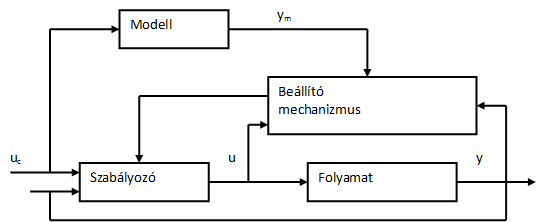

#Self tuning módszer
Másodikként az ún. self-tuning vagy önbeállító adaptív szabályozást kell megemlíteni. Ebben a sémában a szabályozott szakasz paramétereit folyamatosan megbecsüljük, a becsült paraméterek ismeretében folyamatosan újra tervezzük kompenzáló tag paramétereinek értékét. A self-tuning adaptív szabályozás alapstruktúrája a következő ábrán látható.

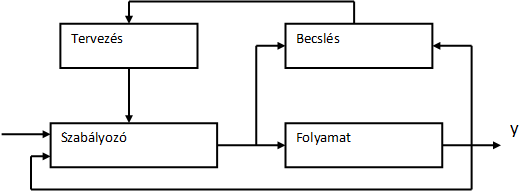

A self-tuning szabályozási rendszer két hurkot tartalmaz. A belső hurok a folyamatból és egy közönséges lineáris visszacsatolásból áll. A szabályozási paraméterek a külső hurok által szabályozzuk, amely egy rekurzív paraméterbecslőből és egy ún. tervezőből áll. Sokféle self-tuning szabályozási sémát kaphatunk a különböző tervezési és becslési algoritmusok kombinálásával.


#Példa program:
A kiválasztott példám az adaptív felfüggesztést veszi folyamatában.

Először is kezdjünk a virtuális gép beállításával:.

In [25]:
!pip install slycot simupy  control simple-pid # optional

In [26]:
import os
import matplotlib.pyplot as plt  # MATLAB plotting functions
from control import *    # MATLAB-like functions
import numpy as np
from simple_pid import PID
# a rendszer állapotjai ;-;
m1 = 2500
m2 = 320
k1 = 80000
k2 = 500000
b1 = 350
b2 = 15020

#rendszer felállítása 
#a rendszer http://ctms.engin.umich.edu/CTMS/index.php?example=Suspension&section=ControlPID linken elérhető

nump=[(m1+m2), b2, k2]
denp=[(m1*m2), (m1*(b1+b2))+(m2*b1), (m1*(k1+k2))+(m2*k1)+(b1*b2), (b1*k2)+(b2*k1), k1*k2]
G1=tf(nump,denp)

num1=[-(m1*b2) -(m1*k2), 0, 0]
den1=[(m1*m2), (m1*(b1+b2))+(m2*b1), (m1*(k1+k2))+(m2*k1)+(b1*b2), (b1*k2)+(b2*k1), k1*k2]
G2=tf(num1,den1)

numf=num1
denf=nump
F=tf(numf,denf)

PID függvény beállítása

In [27]:
Kd = 208025;
Kp = 832100;
Ki = 624075;
pid = PID(Kp,Ki,Kd)

(array([-23.97578071+35.18696867j, -23.97578071-35.18696867j,
         -0.10984429 +5.25047368j,  -0.10984429 -5.25047368j]),
 array([-2.66312057+13.04656098j, -2.66312057-13.04656098j]))

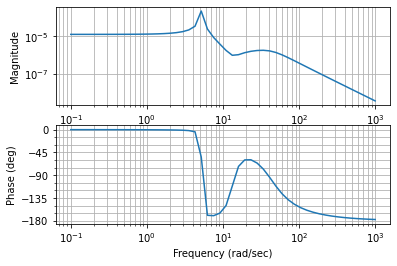

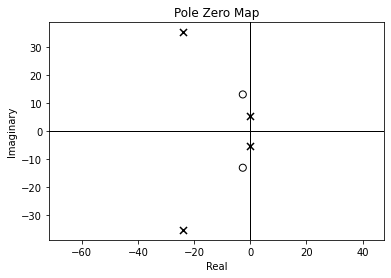

In [28]:
sys_cl=feedback(G1)
bode_plot(sys_cl)
pzmap(sys_cl)

Step response függvény

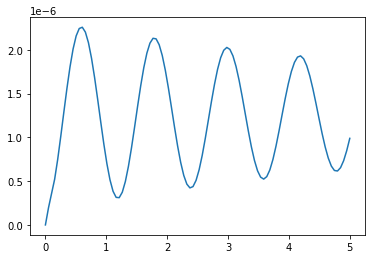

In [39]:
t=np.linspace(0,5,100);
T, yout=step_response(0.1*sys_cl,t)
plt.plot(T,yout)